## 指数分布を作る

指数分布に見える現象は身近に観察できる．
その理由の一つが，

> ランダムに生じる現象の時間間隔は指数分布になる

という数学的事実である．
このことを一様乱数をもとにして実際に作ってみよう．



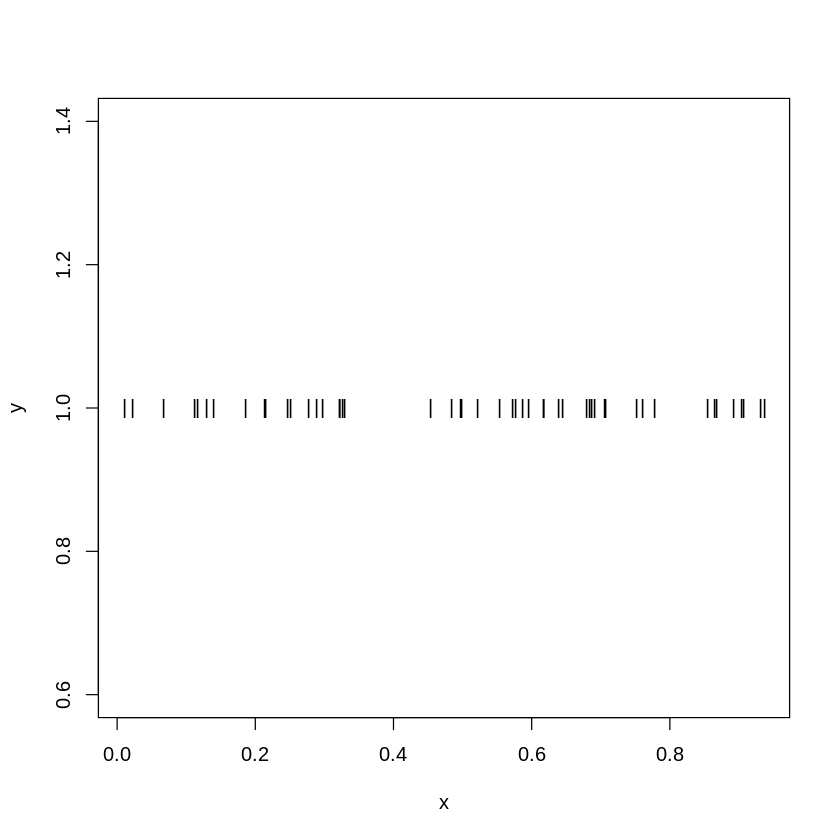

In [4]:
n <- 50
#  runifは0から1の間の一様乱数をn個生成する
x <- runif(n)
#  xに対するy軸の値を一定値でn個用意する
y <- rep(1,n)
#  pch="|"はプロットする点の形を指定
plot(x,y,pch="|")

ここで「｜」を一様乱数の値に応じてプロットした．yの値1に意味はなく，
横方向に値を表示させるためだけに与えてある．
ランダム（まったく規則性のない）な現象が一様に分布するというのは，どこでも均一という意味ではない．
部分的に集まって見えるところや空白の大きなところが見つかったりする．
これが人間にとってランダムな現象を直感的に把握することを困難にしている理由の一つである．

問：一様乱数の点の個数nを増やしたとき，上のプロットの結果はどのように変化するだろうか，確かめてみよ．

次に関数histによりヒストグラムに表してみよう．
50個程度のデータから等確率に見えることはなさそうである．

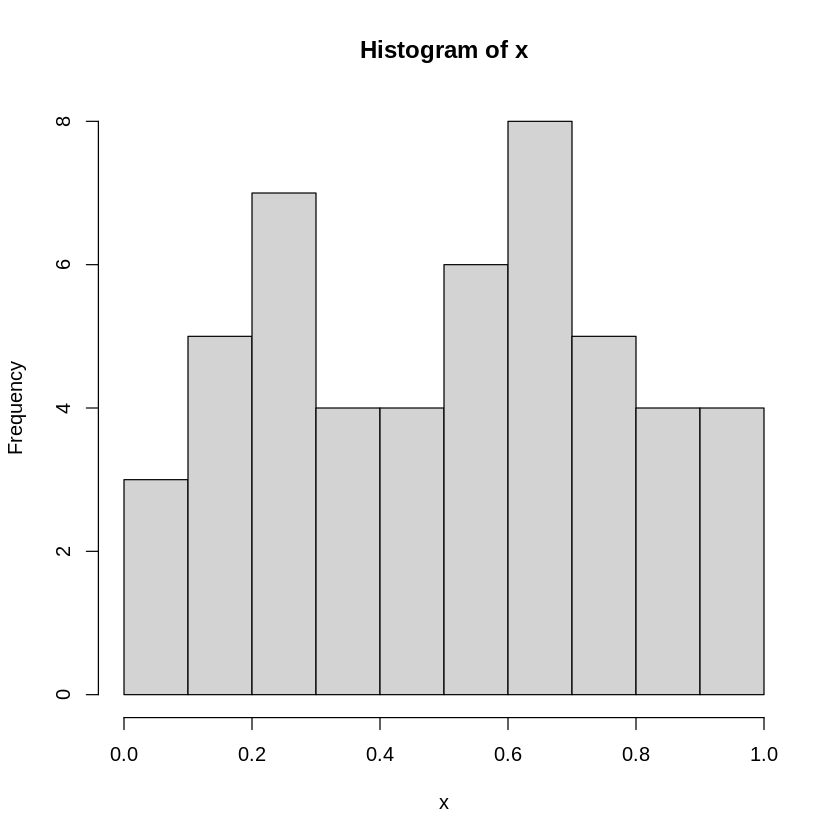

In [5]:
hist(x)

問：一様乱数の点の個数nを増やしたとき，上のヒストグラムはどのように変化するだろうか，確かめてみよ．

次に，この「｜」の間隔に注目して集計したいので，値の大きさの順に並べ直す．

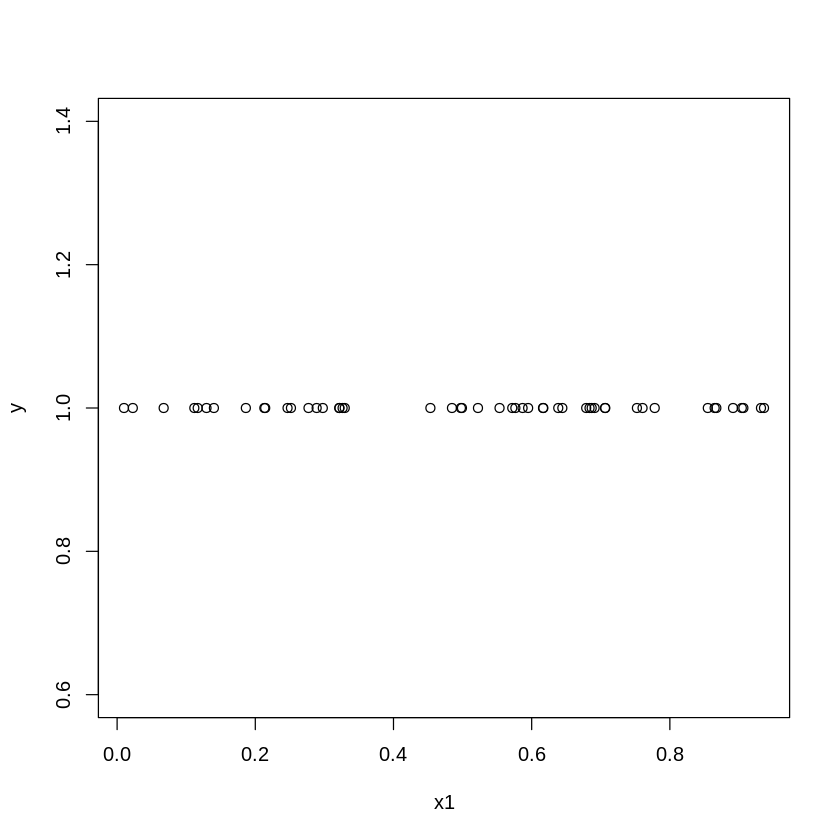

In [6]:
x1 <- sort(x)
plot(x1,y)

関数sortにより値を大きさの順に並べ替えた．
yの値を1でプロットした上のグラフでは何も変わったようには見えないだろう．そこでデータの並ぶ順番にyの値を変化させてプロットしてみる．

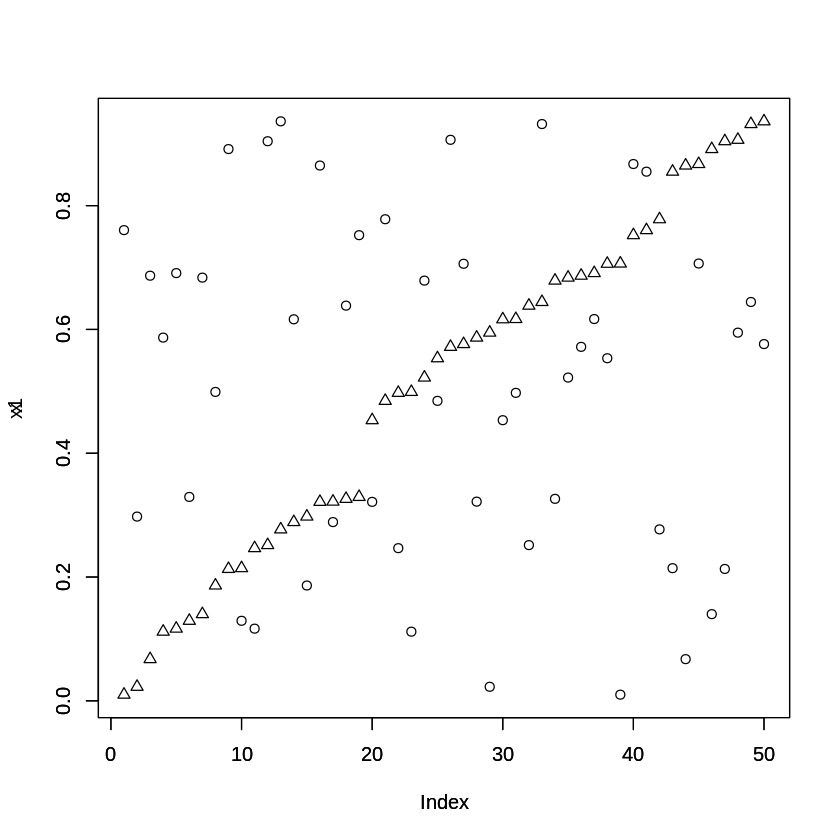

In [7]:
plot(x)
#  グラフの重ね書き
par(new=T)
#  pch=2は△で表示させる指定
plot(x1,pch=2)

並べ替えた乱数は△でプロットした．
この表現では同じデータをプロットしたように見えなくても，
その違いは単に大きさの順に並べ替えただけなのである．

## 時間間隔の分布

乱数の値を「時刻」と思うことにする．
次の図は並べ替えた乱数の値の差をヒストグラムに表した．

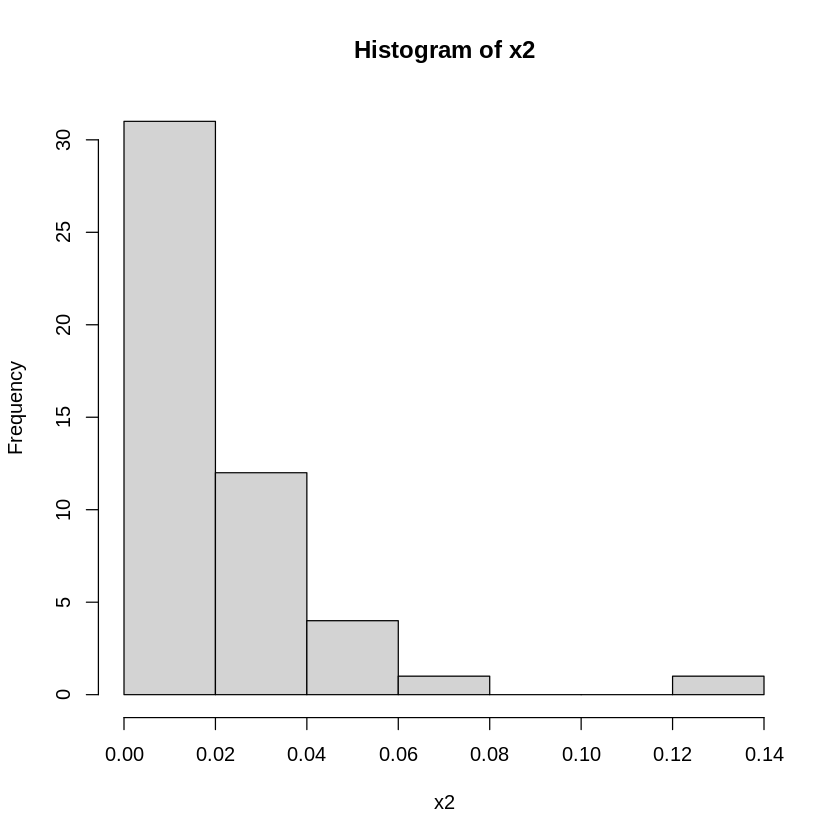

In [8]:
#  x2に時刻の差を保存する
x2 = array(n)
#  x3 = array(n)
for (i in 1:n-1) {
  x2[i] = x1[i+1]-x1[i]
#  省略するが，次のx3をヒストグラムにするとどんな形になるだろうか
#  x3[i] = x1[i+1]-x[i]
}
hist(x2)
# hist(x3)

標本の大きさが50であるこのグラフでは，度数が一直線に減っているのか，それとは異なる減り方をしているのかよくわからない．
標本の大きさを10000にして実行してみよう．

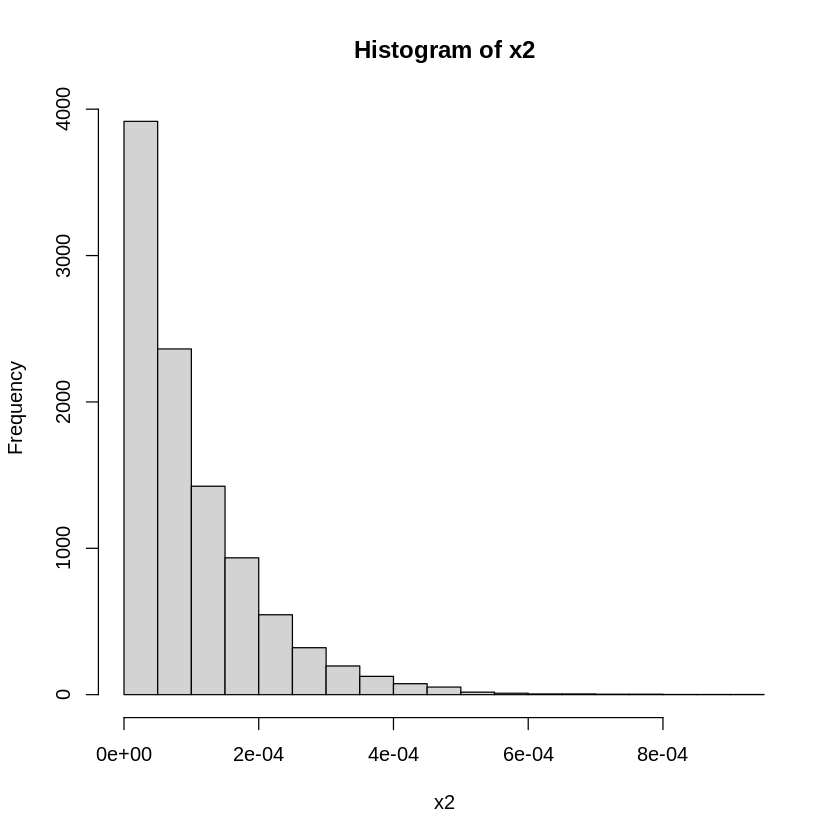

In [9]:
# 以上の処理を一つの手続きにまとめた
n <- 10000
x <- runif(n)
# 点プロット，不要なので実行させない
# y <- rep(1,n)
# plot(x,y,pch="|")
x1 <- sort(x)
# 点プロット，不要なので実行させない
# plot(x1,y)
x2 = array(n)
# x3 = array(n)
for (i in 1:n-1) {
  x2[i] = x1[i+1]-x1[i]
#   x3[i] = x1[i+1]-x[i]
}
hist(x2)
# hist(x3)

区間ごとの度数が左から右へ隣同士で6割から7割程度に減っているのが読み取れるだろうか．
数学的に厳密に定義される指数分布では，この減る割合が区間の取り方によらず，一定の割合になる．
この特徴を数式に与えると次のようになる．
$$
y=\lambda e^{-\lambda x},\quad \lambda\geq 0
$$
定数$\lambda$は，実データからは平均として得ることができる．
この指数分布の数学的性質の一つに，平均と標準偏差は等しく $1/\lambda$ という事実がある．
これを上のデータで計算させてみよう．

In [10]:
# 平均の計算
mean(x2)
# 標準偏差の計算
sd(x2)
# 比を確認する
mean(x2)/sd(x2)

[1] 9.999662e-05

[1] 9.875737e-05

[1] 1.012548

数式計算ではなく実際のデータによる計算なので，ちょうど1になるわけではない．
しかし，ほぼ1であることは確認できる．

なお，平均の値の表示「e-05」は10のマイナス5乗，すなわち $10^{-5}$ を表す表示（科学技術計算表示）である．
表計算や関数電卓など1行に出力を表す場合によく用いられる．